In [1]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

# for run R code in jupyter notebook
import os
os.environ['R_HOME'] = "C:/Users/heung/anaconda3/Lib/R"

# to use R in jupyter notebook
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

cffi mode is CFFI_MODE.ANY
R home found: C:/Users/heung/anaconda3/Lib/R
Default options to initialize R: rpy2, --quiet, --no-save
C:\Users\heung\AppData\Local\Temp\ipykernel_26796\2127491082.py:32: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
c:\Users\heung\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.


In [2]:
adata = sc.read("adata_concat.h5ad")

In [3]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_ribo,...,MT_outlier,scDblFinder_score,scDblFinder_class,batch,leiden_res0_25,leiden_res0_5,leiden_res1,leiden_res2,cell_type,condition
AAACCTGAGAAACCGC-1-normal_1,1839,1838,7.516977,6291.0,8.747034,24.765538,117.0,4.770685,1.859800,2799.0,...,False,0.000065,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGACCACA-1-normal_1,1980,1978,7.590347,6907.0,8.840435,25.727523,186.0,5.231109,2.692920,3114.0,...,False,0.000020,singlet,normal_1,5,6,7,6,CD8 T cells,normal
AAACCTGAGGATCGCA-1-normal_1,3024,3024,8.014666,9196.0,9.126633,16.746411,362.0,5.894403,3.936494,1643.0,...,False,0.058833,singlet,normal_1,6,8,9,16,CD16 Monocytes,normal
AAACCTGAGGCACATG-1-normal_1,1764,1764,7.475906,6365.0,8.758727,27.541241,96.0,4.574711,1.508248,2874.0,...,False,0.000126,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGTGCACA-1-normal_1,2055,2055,7.628518,6529.0,8.784163,22.346454,211.0,5.356586,3.231735,2472.0,...,False,0.000733,singlet,normal_1,5,6,7,6,CD8 T cells,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCTCC-1-hiv_3,1255,1255,7.135687,2367.0,7.769801,21.419518,53.0,3.988984,2.239121,405.0,...,False,0.000924,singlet,hiv_3,1,0,0,7,CD4 T cells,hiv
TTTGTCATCCAAATGC-1-hiv_3,1960,1959,7.580700,4776.0,8.471568,16.729481,144.0,4.976734,3.015075,840.0,...,False,0.000645,singlet,hiv_3,6,8,9,13,CD16 Monocytes,hiv
TTTGTCATCCAGGGCT-1-hiv_3,1115,1114,7.016610,2084.0,7.642524,22.120921,46.0,3.850147,2.207294,325.0,...,False,0.001734,singlet,hiv_3,2,2,2,3,NK cells,hiv
TTTGTCATCGTACGGC-1-hiv_3,1321,1321,7.186901,2621.0,7.871693,19.954216,75.0,4.330733,2.861503,578.0,...,False,0.072768,singlet,hiv_3,1,0,0,8,CD4 T cells,hiv


In [4]:
adata_hiv = adata[adata.obs["condition"] == "hiv"].copy()
adata_norm = adata[adata.obs["condition"] == "normal"].copy()

In [6]:
from liana.method import cellphonedb

In [7]:
cellphonedb(
    adata_hiv,
    groupby = "cell_type",
    use_raw = False,
    return_all_lrs = True,
    verbose = True
)

cellphonedb(
    adata_norm,
    groupby = "cell_type",
    use_raw = False,
    return_all_lrs = True,
    verbose = True
)

Using `.X`!
c:\Users\heung\anaconda3\Lib\site-packages\anndata\_core\anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
c:\Users\heung\anaconda3\Lib\site-packages\liana\method\_pipe_utils\_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `consensus`.
0.93 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 19603 samples and 32 features


100%|██████████| 1000/1000 [00:02<00:00, 391.43it/s]
Using `.X`!
c:\Users\heung\anaconda3\Lib\site-packages\anndata\_core\anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
c:\Users\heung\anaconda3\Lib\site-packages\liana\method\_pipe_utils\_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `consensus`.
0.93 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 22225 samples and 32 features


100%|██████████| 1000/1000 [00:02<00:00, 368.68it/s]


In [8]:
adata_hiv.uns["liana_res"].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lrs_to_keep,lr_means,cellphone_pvals
1871,HLA-DRA,HLA-DRA,4.415055,1.000000,LAG3,LAG3,0.228997,0.208696,Dendritic cells,etc.,True,2.322026,0.0
331,HLA-DRA,HLA-DRA,4.415055,1.000000,LAG3,LAG3,0.218560,0.147103,Dendritic cells,CD8 T cells,True,2.316808,0.0
1431,HLA-DRA,HLA-DRA,4.415055,1.000000,LAG3,LAG3,0.205169,0.121969,Dendritic cells,NK cells,True,2.310112,0.0
1873,HLA-DRB1,HLA-DRB1,3.893238,0.979798,LAG3,LAG3,0.228997,0.208696,Dendritic cells,etc.,True,2.061117,0.0
333,HLA-DRB1,HLA-DRB1,3.893238,0.979798,LAG3,LAG3,0.218560,0.147103,Dendritic cells,CD8 T cells,True,2.055899,0.0


In [ ]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200, facecolor="white")
sc.set_figure_params(figsize=(10, 10))

c:\Users\heung\anaconda3\Lib\site-packages\liana\plotting\_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


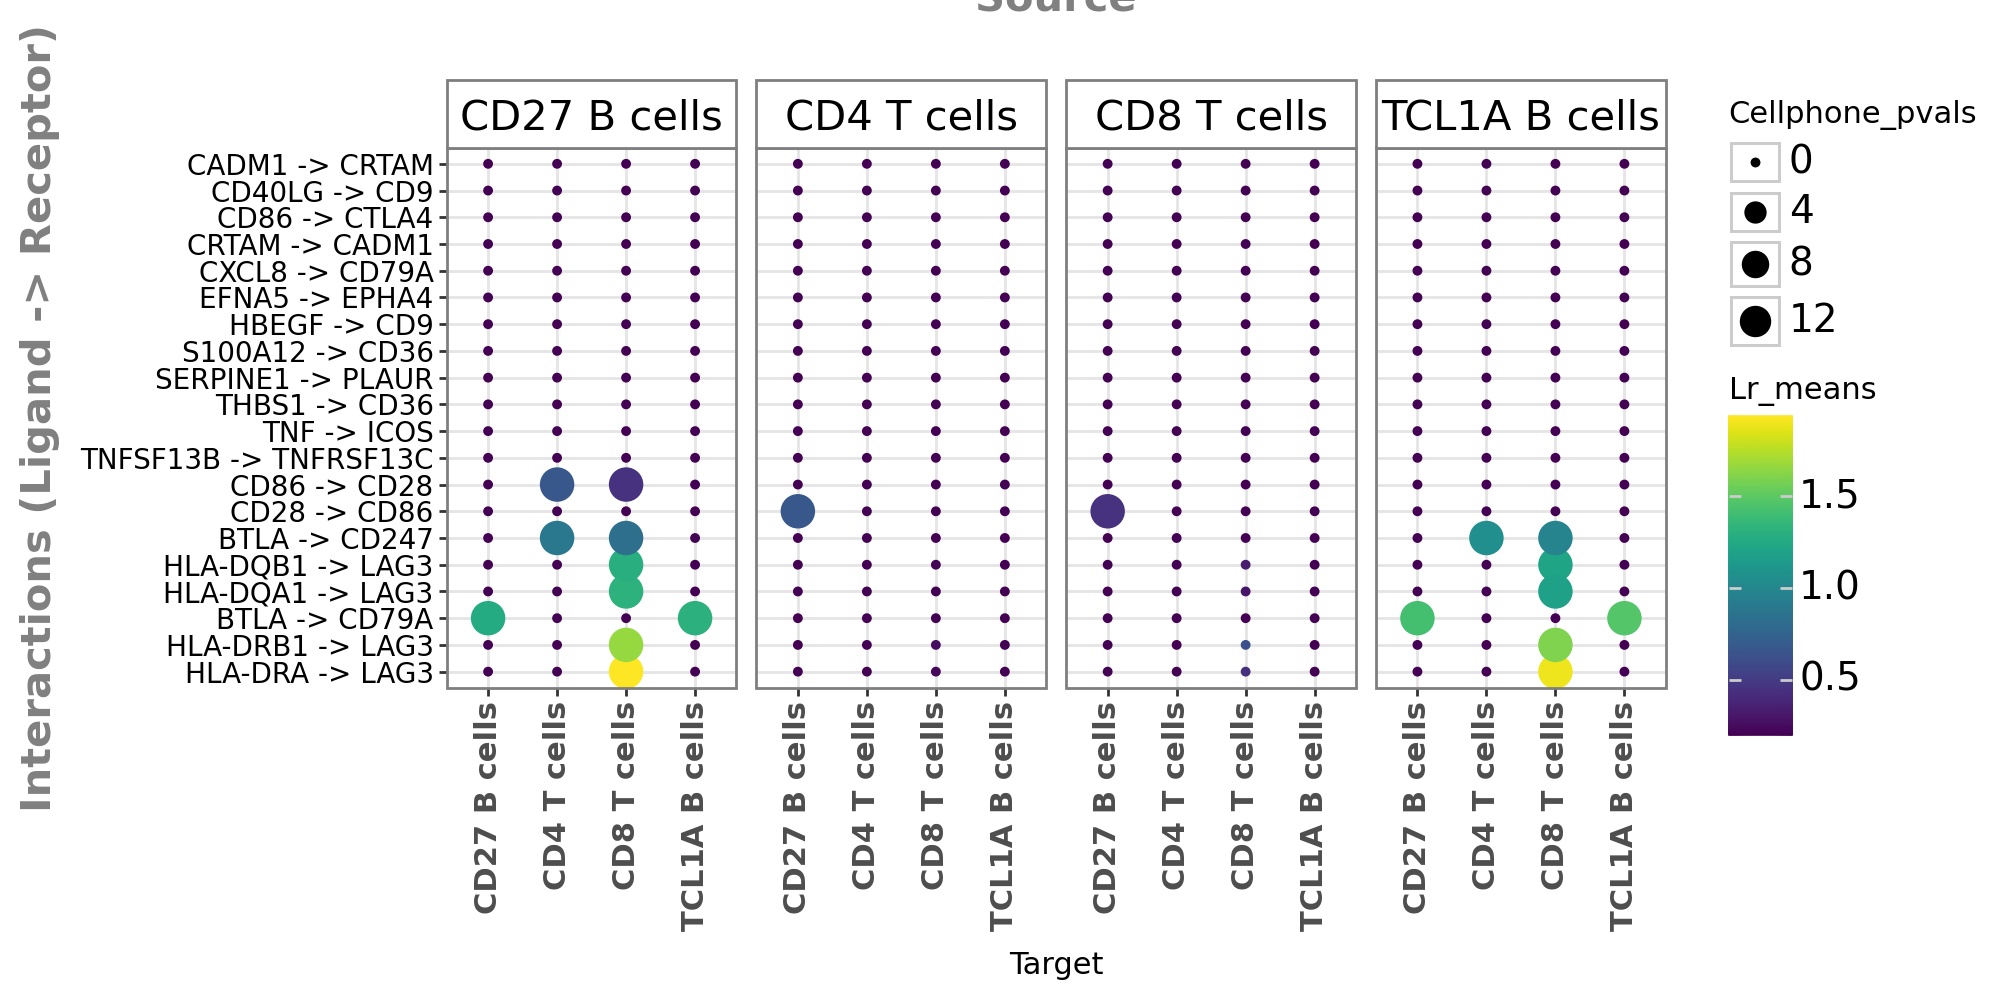

In [24]:
li.pl.dotplot(
    adata=adata_hiv,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["CD4 T cells", "CD8 T cells", "CD27 B cells", "TCL1A B cells"],

    target_labels=["CD4 T cells", "CD8 T cells", "CD27 B cells", "TCL1A B cells"],

    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby = "cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(10, 5),
    size_range=(1, 6),
)

c:\Users\heung\anaconda3\Lib\site-packages\liana\plotting\_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


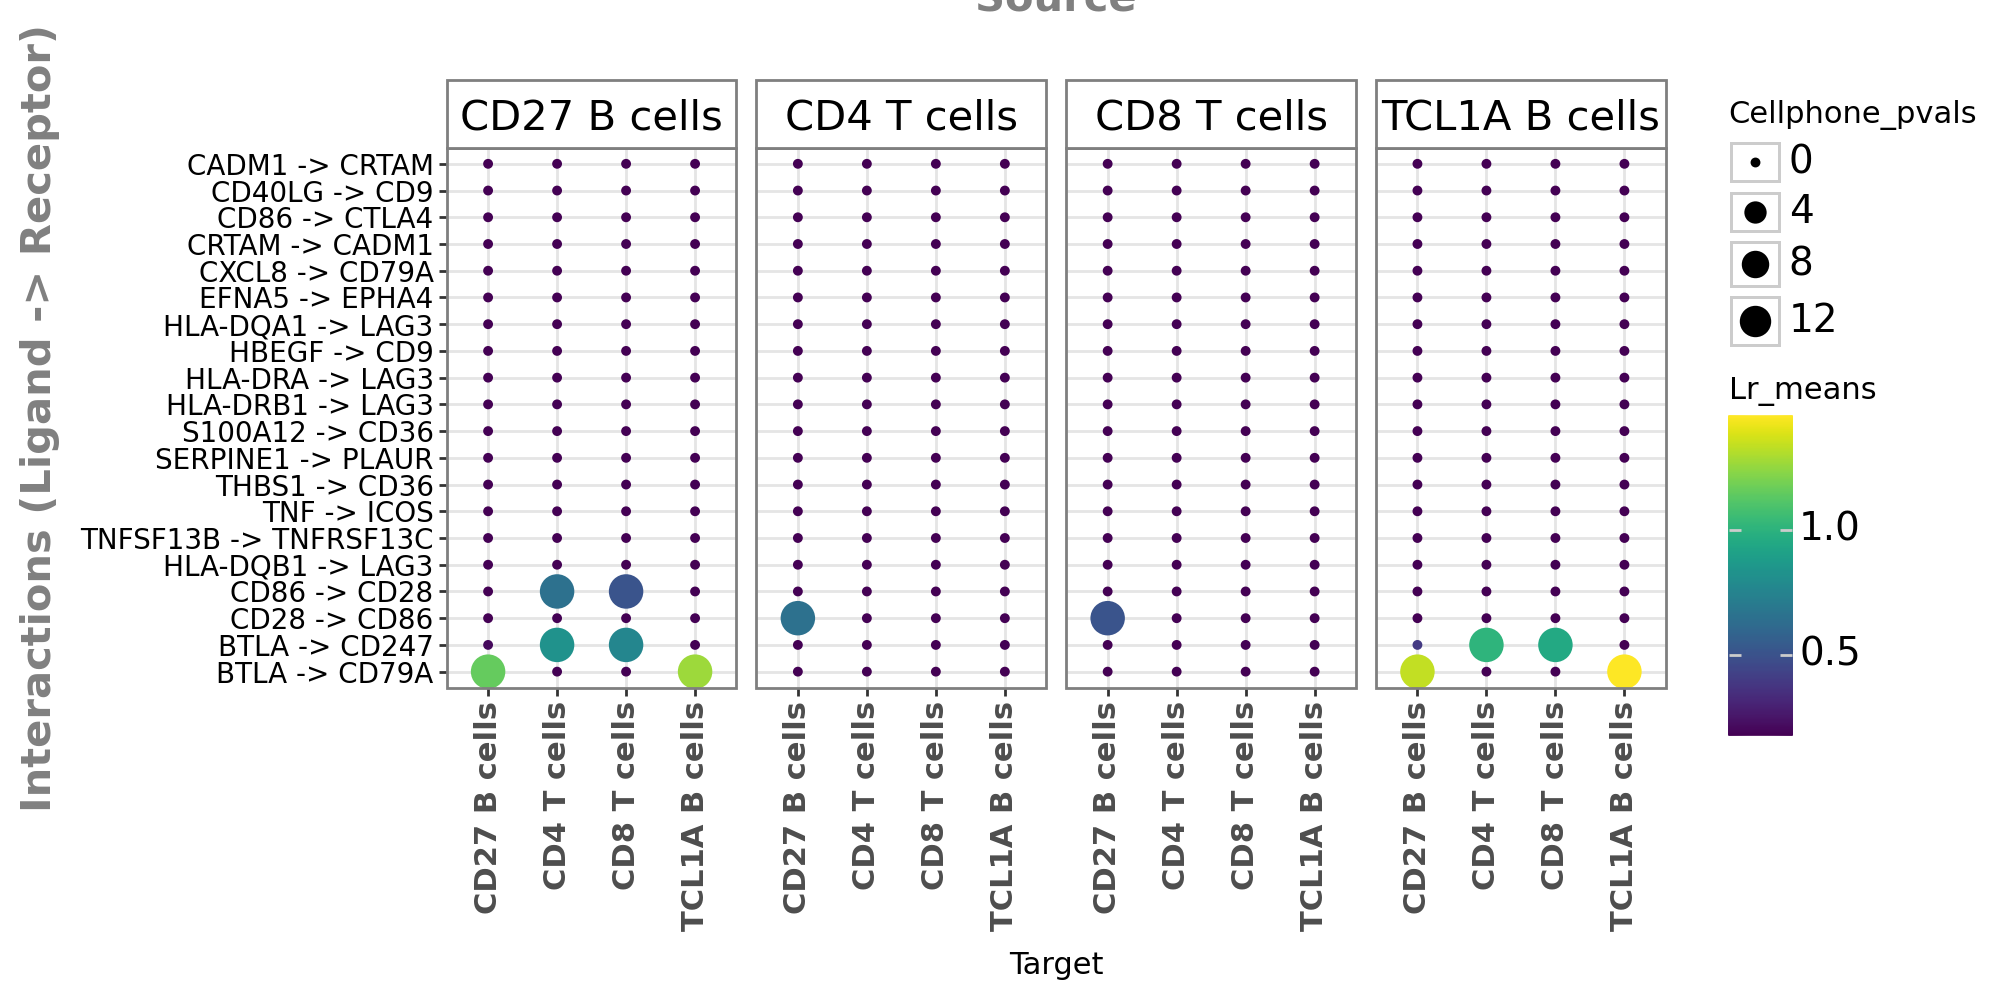

In [25]:
li.pl.dotplot(
    adata=adata_norm,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["CD4 T cells", "CD8 T cells", "CD27 B cells", "TCL1A B cells"],
    target_labels=["CD4 T cells", "CD8 T cells", "CD27 B cells", "TCL1A B cells"],
    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby = "cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(10, 5),
    size_range=(1, 6),
)

In [11]:
adata.layers["counts"] = adata.X.copy()

In [ ]:
# adata.obs["sample"] = (
#     adata.obs["condition"].astype("str")
# )

In [ ]:
adata.layers["counts"]

In [12]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_ribo,...,MT_outlier,scDblFinder_score,scDblFinder_class,batch,leiden_res0_25,leiden_res0_5,leiden_res1,leiden_res2,cell_type,condition
AAACCTGAGAAACCGC-1-normal_1,1839,1838,7.516977,6291.0,8.747034,24.765538,117.0,4.770685,1.859800,2799.0,...,False,0.000065,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGACCACA-1-normal_1,1980,1978,7.590347,6907.0,8.840435,25.727523,186.0,5.231109,2.692920,3114.0,...,False,0.000020,singlet,normal_1,5,6,7,6,CD8 T cells,normal
AAACCTGAGGATCGCA-1-normal_1,3024,3024,8.014666,9196.0,9.126633,16.746411,362.0,5.894403,3.936494,1643.0,...,False,0.058833,singlet,normal_1,6,8,9,16,CD16 Monocytes,normal
AAACCTGAGGCACATG-1-normal_1,1764,1764,7.475906,6365.0,8.758727,27.541241,96.0,4.574711,1.508248,2874.0,...,False,0.000126,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGTGCACA-1-normal_1,2055,2055,7.628518,6529.0,8.784163,22.346454,211.0,5.356586,3.231735,2472.0,...,False,0.000733,singlet,normal_1,5,6,7,6,CD8 T cells,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCTCC-1-hiv_3,1255,1255,7.135687,2367.0,7.769801,21.419518,53.0,3.988984,2.239121,405.0,...,False,0.000924,singlet,hiv_3,1,0,0,7,CD4 T cells,hiv
TTTGTCATCCAAATGC-1-hiv_3,1960,1959,7.580700,4776.0,8.471568,16.729481,144.0,4.976734,3.015075,840.0,...,False,0.000645,singlet,hiv_3,6,8,9,13,CD16 Monocytes,hiv
TTTGTCATCCAGGGCT-1-hiv_3,1115,1114,7.016610,2084.0,7.642524,22.120921,46.0,3.850147,2.207294,325.0,...,False,0.001734,singlet,hiv_3,2,2,2,3,NK cells,hiv
TTTGTCATCGTACGGC-1-hiv_3,1321,1321,7.186901,2621.0,7.871693,19.954216,75.0,4.330733,2.861503,578.0,...,False,0.072768,singlet,hiv_3,1,0,0,8,CD4 T cells,hiv


In [13]:
# pseudobluk gene set

pdata = dc.get_pseudobulk(
    adata,
    sample_col = "batch",
    groups_col = "cell_type",
    min_prop = 0.1,
    min_smpls = 3,
    layer = "counts"
)

In [14]:
# Storing the raw counts
pdata.layers["counts"] = pdata.X.copy()

# Does PC1 captures a meaningful biological or technical fact?
pdata.obs["lib_size"] = pdata.X.sum(1)

# Normalize
sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)
# check how this looks like
pdata

C:\Users\heung\AppData\Local\Temp\ipykernel_26796\3656282493.py:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.


AnnData object with n_obs × n_vars = 59 × 711
    obs: 'outlier', 'MT_outlier', 'scDblFinder_class', 'batch', 'cell_type', 'condition', 'psbulk_n_cells', 'psbulk_counts', 'lib_size'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'ribo', 'MALAT1', 'highly_variable', 'n_cells-hiv_1', 'n_cells_by_counts-hiv_1', 'mean_counts-hiv_1', 'log1p_mean_counts-hiv_1', 'pct_dropout_by_counts-hiv_1', 'total_counts-hiv_1', 'log1p_total_counts-hiv_1', 'means-hiv_1', 'dispersions-hiv_1', 'dispersions_norm-hiv_1', 'n_cells-hiv_2', 'n_cells_by_counts-hiv_2', 'mean_counts-hiv_2', 'log1p_mean_counts-hiv_2', 'pct_dropout_by_counts-hiv_2', 'total_counts-hiv_2', 'log1p_total_counts-hiv_2', 'means-hiv_2', 'dispersions-hiv_2', 'dispersions_norm-hiv_2', 'n_cells-hiv_3', 'n_cells_by_counts-hiv_3', 'mean_counts-hiv_3', 'log1p_mean_counts-hiv_3', 'pct_dropout_by_counts-hiv_3', 'total_counts-hiv_3', 'log1p_total_counts-hiv_3', 'means-hiv_3', 'dispersions-hiv_3', 'dispersions_norm-hiv_3', 'n_cells-normal_1', 'n

In [17]:
pdata.obs

,outlier,MT_outlier,scDblFinder_class,batch,cell_type,condition,psbulk_n_cells,psbulk_counts,lib_size
hiv_1_CD14 Monocytes,False,False,singlet,hiv_1,CD14 Monocytes,hiv,658.0,165915.453125,164753.937500
hiv_2_CD14 Monocytes,False,False,singlet,hiv_2,CD14 Monocytes,hiv,925.0,241461.156250,237120.406250
hiv_3_CD14 Monocytes,False,False,singlet,hiv_3,CD14 Monocytes,hiv,1030.0,250437.156250,248564.046875
normal_1_CD14 Monocytes,False,False,singlet,normal_1,CD14 Monocytes,normal,471.0,131502.171875,130483.304688
normal_2_CD14 Monocytes,False,False,singlet,normal_2,CD14 Monocytes,normal,390.0,98916.757812,97947.078125
normal_3_CD14 Monocytes,False,False,singlet,normal_3,CD14 Monocytes,normal,870.0,205348.000000,203571.859375
hiv_1_CD16 Monocytes,False,False,singlet,hiv_1,CD16 Monocytes,hiv,425.0,98145.562500,97239.656250
hiv_2_CD16 Monocytes,False,False,singlet,hiv_2,CD16 Monocytes,hiv,188.0,46275.085938,45410.609375
hiv_3_CD16 Monocytes,False,False,singlet,hiv_3,CD16 Monocytes,hiv,462.0,109109.953125,108101.296875
normal_1_CD16 Monocytes,False,False,singlet,normal_1,CD16 Monocytes,normal,311.0,73908.812500,73196.437500


In [15]:
logFCs, pvals = dc.get_contrast(
    pdata,
    group_col="cell_type",
    condition_col="condition",
    condition="hiv",
    reference="normal",
    method="t-test"
)

ValueError: Value passed for key 'psbulk_props' is of incorrect shape. Values of layers must match dimensions ('obs', 'var') of parent. Value had shape (6, 711) while it should have had (59, 711).